<a href="https://colab.research.google.com/github/ArincDemirel/PyTorch--Deep-Learning-Projects/blob/main/02_Neural_Network_Classification_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Classification with PyTorch
import sklearn

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000


In [3]:
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [6]:
import pandas as pd
circles = pd.DataFrame({'X1':X[:,0],
                        "X2":X[:,1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [7]:
import matplotlib.pyplot as plt

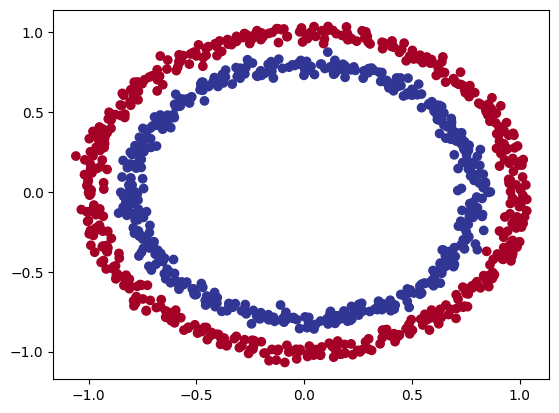

In [8]:
plt.scatter(x=X[:,0],
            y=X[:,1],
            c =y,
            cmap = plt.cm.RdYlBu);

* Let's clasify two circles from each other
* We will be classfying a data point which fits in to which circle and it will be labeled either 0 or 1
* We will turn the data into tensors

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
import torch
torch.__version__

'2.1.0+cu118'

In [11]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [12]:
X_tensor = torch.from_numpy(X).type(torch.float)
y_tensor = torch.from_numpy(y).type(torch.float)
X_tensor

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]])

In [13]:
#Split data into test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tensor,
                                                    y_tensor,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [14]:
X_train.T.shape, X_test.shape , y_train.shape, y_test.shape

(torch.Size([2, 800]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [15]:
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [16]:
class CircleClassifierModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nn.Linear layers capable of handling X and y input and output shapes
    self.layer_1 = nn.Linear(in_features = 2, out_features = 8 ) # takes 2 in features and up scales to 8
    self.layer_2 = nn.Linear(in_features = 8 , out_features = 1 )

  def forward(self, x):
    return self.layer_2(self.layer_1(x) ) # x -> layer 1 -> layer2


In [17]:
model_0 = CircleClassifierModelV0().to(device)
model_0

CircleClassifierModelV0(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=1, bias=True)
)

In [18]:
model_0_replicate = nn.Sequential(nn.Linear(in_features = 2, out_features = 8 ),
                                  nn.Linear(in_features = 2, out_features = 8 )).to(device)
model_0_replicate

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=2, out_features=8, bias=True)
)

In [19]:
class CircleClassifierModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nn.Linear layers capable of handling X and y input and output shapes
    # self.layer_1 = nn.Linear(in_features = 2, out_features = 8 ) # takes 2 in features and up scales to 8
    # self.layer_2 = nn.Linear(in_features = 8 , out_features = 1 )
    self.two_layers = nn.Sequential(nn.Linear(in_features = 2, out_features = 8 ),
                                  nn.Linear(in_features = 2, out_features = 8 ))
  def forward(self, x):
    # return self.layer_2(self.layer_1(x) ) # x -> layer 1 -> layer2
    return self.two_layers(x)


In [20]:
model_1 = CircleClassifierModelV1().to(device)
model_1

CircleClassifierModelV1(
  (two_layers): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=2, out_features=8, bias=True)
  )
)

In [21]:
model_1.state_dict()

OrderedDict([('two_layers.0.weight',
              tensor([[-0.4105,  0.4509],
                      [-0.5570, -0.1931],
                      [-0.6507, -0.3746],
                      [ 0.2778, -0.6458],
                      [ 0.6205,  0.5297],
                      [-0.4165,  0.6176],
                      [-0.2590,  0.3052],
                      [ 0.2162,  0.2874]], device='cuda:0')),
             ('two_layers.0.bias',
              tensor([-0.0037, -0.3811,  0.1802, -0.5715, -0.1196, -0.1622, -0.4127,  0.3210],
                     device='cuda:0')),
             ('two_layers.1.weight',
              tensor([[-0.0868,  0.6587],
                      [ 0.0082,  0.0765],
                      [ 0.0191, -0.1633],
                      [ 0.1357, -0.3146],
                      [-0.0991,  0.0600],
                      [ 0.6722,  0.1503],
                      [-0.2604, -0.5613],
                      [ 0.4175, -0.5087]], device='cuda:0')),
             ('two_layers.1.bias',
         

In [22]:
model_1.state_dict()['two_layers.0.weight'].shape # 2 inputs 8 outputs the the tensor is 8,2


torch.Size([8, 2])

In [23]:
device

'cuda'

In [24]:
with torch.inference_mode(): ## Inference mode is gonna keep track of the gradient
  y_preds = model_0(X_test.to(device))
torch.round(y_preds[:10])

tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')

In [25]:
y_test.reshape([200,1]).shape,y_preds.shape

(torch.Size([200, 1]), torch.Size([200, 1]))

In [26]:
#let's calculate cross entropy for loss function

loss_fn = torch.nn.BCEWithLogitsLoss()

In [27]:
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01) # lr learnining rate

In [28]:
X_train.shape,X_test.shape

(torch.Size([800, 2]), torch.Size([200, 2]))

In [29]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/ len(y_pred)) * 100
  return acc

In [30]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))
y_logits[:10]

tensor([[-0.1337],
        [-0.1609],
        [ 0.0991],
        [-0.2004],
        [ 0.3557],
        [ 0.3371],
        [ 0.0573],
        [ 0.1746],
        [ 0.0879],
        [-0.1599]], device='cuda:0')

# Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

* Our model outputs are going to be raw logits.
* We can convert there logits into prdiction probabilities by passing them to some kind of activation funbvtion(e.g. sigmoid for binary clasification and softmax for multiclass clasification)
* Then we can convert our model's prediction probabilities to predcition lables by either rounding them or taking the argmax().

In [31]:
device

'cuda'

In [82]:
torch.cuda.manual_seed(42)
def model_run(X_train, y_train, X_test , y_test, loss_fn , optimizer , model ,epochs = 1000):

  device = "cuda" if torch.cuda.is_available() else "cpu"
  # Put data to the target device

  X_train, y_train = X_train.to(device), y_train.to(device)
  X_test, y_test = X_test.to(device), y_test.to(device)

  for epoch in range(epochs):

    model.train()

    y_logits = model(X_train).squeeze().to(device)
    y_pred_train = torch.round(torch.sigmoid(y_logits))

    train_loss = loss_fn(y_logits, y_train)
    acc_train = accuracy_fn(y_true=y_train, y_pred=y_pred_train)

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()
    model.eval() # turns off gradient tracking(testing step)

    with torch.inference_mode():
      y_logits_test = model(X_test).squeeze()
      test_loss = loss_fn(y_logits_test, y_test)
      y_pred_test = torch.round(torch.sigmoid(y_logits))
      acc_test = accuracy_fn(y_true=y_train, y_pred=y_pred_test)


    if epoch %10 == 0:
      print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Accuracy: {acc_train:.2f}% | Test loss: {test_loss:.5f}, Test acc: {acc_test:.2f}%")
      print(f"-------")

In [33]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)
model_run(X_train, y_train, X_test, y_test, loss_fn , optimizer = optimizer  , model = model_0 , epochs = 1000)

Epoch: 0 | Loss: 0.70043, Accuracy: 51.38% | Test loss: 0.69390, Test acc: 51.38%
-------
Epoch: 10 | Loss: 0.69999, Accuracy: 51.38% | Test loss: 0.69366, Test acc: 51.38%
-------
Epoch: 20 | Loss: 0.69959, Accuracy: 51.62% | Test loss: 0.69345, Test acc: 51.62%
-------
Epoch: 30 | Loss: 0.69923, Accuracy: 51.62% | Test loss: 0.69326, Test acc: 51.62%
-------
Epoch: 40 | Loss: 0.69890, Accuracy: 51.12% | Test loss: 0.69310, Test acc: 51.12%
-------
Epoch: 50 | Loss: 0.69860, Accuracy: 51.38% | Test loss: 0.69296, Test acc: 51.38%
-------
Epoch: 60 | Loss: 0.69832, Accuracy: 51.25% | Test loss: 0.69284, Test acc: 51.25%
-------
Epoch: 70 | Loss: 0.69807, Accuracy: 50.75% | Test loss: 0.69273, Test acc: 50.75%
-------
Epoch: 80 | Loss: 0.69783, Accuracy: 50.62% | Test loss: 0.69264, Test acc: 50.62%
-------
Epoch: 90 | Loss: 0.69762, Accuracy: 50.50% | Test loss: 0.69256, Test acc: 50.50%
-------
Epoch: 100 | Loss: 0.69742, Accuracy: 50.50% | Test loss: 0.69249, Test acc: 50.50%
-------

In [13]:
from torch.autograd import Variable
import torch
import numpy as np

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on).to(device)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot

    y_pred = y_pred.reshape(xx.shape).detach().cpu().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

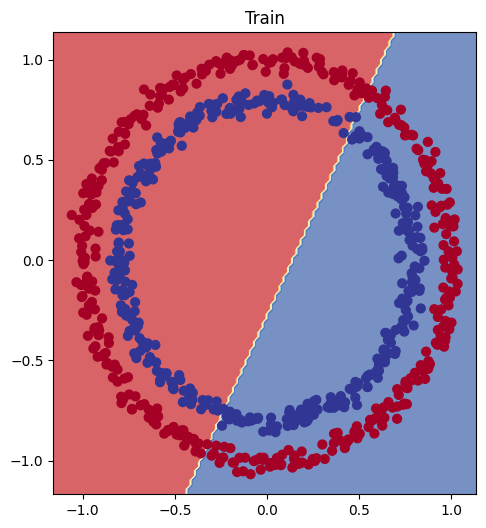

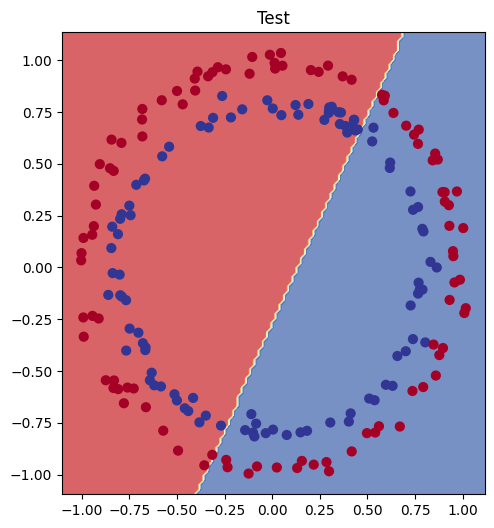

In [35]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

This graph summarizes the 50 percent accuracy since it is splitting the graph into half and classify.

Let's improve the model :)
What to try ?

--> Add more layers

--> Add more hidden units

--> Change the activation function

--> Change learning rate


--> Change loss function

P.S.: This is a self improvement trial project, it is clearly seen that this problem is not linearly solvable and our layers are only linear :)

In [1]:
import matplotlib.pyplot as plt
import sklearn
import torch
from sklearn.datasets import make_circles

from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

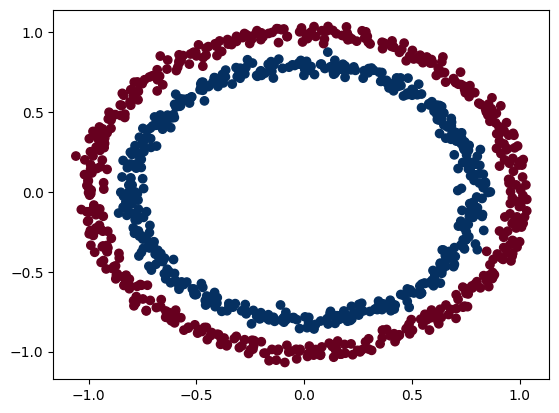

In [2]:
torch.cuda.manual_seed(42)
n_samples = 1000
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
X_tensor = torch.from_numpy(X).type(torch.float).to(device)
y_tensor = torch.from_numpy(y).type(torch.float).to(device)

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X_tensor,
                                                    y_tensor,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [6]:
class CircleClassifierModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 8)
    self.layer_2 = nn.Linear(in_features = 8, out_features = 8)
    self.layer_3 = nn.Linear(in_features = 8, out_features = 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x))))))



In [7]:
model_2 = CircleClassifierModelV2().to(device)

In [8]:
X_train.device, y_train.device, X_test.device, y_test.device

(device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0))

In [9]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.03)
# model_run(X_train, y_train, X_test, y_test, loss_fn , optimizer = optimizer , model = model_2, epochs = 1000)

In [10]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/ len(y_pred)) * 100
  return acc

In [11]:
epochs = 10000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  model_2.train()

  y_logits = model_2(X_train).squeeze()

  y_pred_train = torch.round(torch.sigmoid(y_logits))

  train_loss = loss_fn(y_logits, y_train)
  acc_train = accuracy_fn(y_true=y_train, y_pred=y_pred_train)

  optimizer.zero_grad()

  train_loss.backward()

  optimizer.step()
  model_2.eval() # turns off gradient tracking(testing step)

  with torch.inference_mode():
    y_logits_test = model_2(X_test).squeeze()
    test_loss = loss_fn(y_logits_test, y_test)
    y_pred_test = torch.round(torch.sigmoid(y_logits))
    acc_test = accuracy_fn(y_true=y_train, y_pred=y_pred_test)


  if epoch %100 == 0:
    print(f"Epoch: {epoch+100} | Train Loss: {train_loss:.5f}, Train Accuracy: {acc_train:.2f}% | Test loss: {test_loss:.5f}, Test acc: {acc_test:.2f}%")
    print(f"-------")

Epoch: 100 | Train Loss: 0.71098, Train Accuracy: 50.00% | Test loss: 0.70989, Test acc: 50.00%
-------
Epoch: 200 | Train Loss: 0.69402, Train Accuracy: 50.00% | Test loss: 0.69373, Test acc: 50.00%
-------
Epoch: 300 | Train Loss: 0.69100, Train Accuracy: 51.75% | Test loss: 0.69105, Test acc: 51.75%
-------
Epoch: 400 | Train Loss: 0.69050, Train Accuracy: 52.88% | Test loss: 0.69077, Test acc: 52.88%
-------
Epoch: 500 | Train Loss: 0.69000, Train Accuracy: 53.00% | Test loss: 0.69050, Test acc: 53.00%
-------
Epoch: 600 | Train Loss: 0.68952, Train Accuracy: 53.12% | Test loss: 0.69025, Test acc: 53.12%
-------
Epoch: 700 | Train Loss: 0.68910, Train Accuracy: 53.25% | Test loss: 0.68999, Test acc: 53.25%
-------
Epoch: 800 | Train Loss: 0.68867, Train Accuracy: 53.50% | Test loss: 0.68970, Test acc: 53.50%
-------
Epoch: 900 | Train Loss: 0.68819, Train Accuracy: 53.75% | Test loss: 0.68936, Test acc: 53.75%
-------
Epoch: 1000 | Train Loss: 0.68766, Train Accuracy: 54.00% | Test

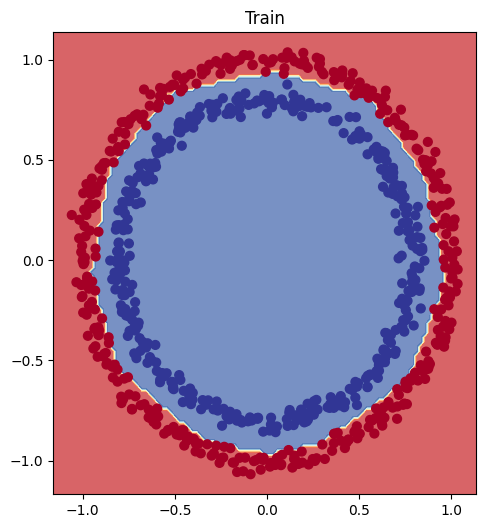

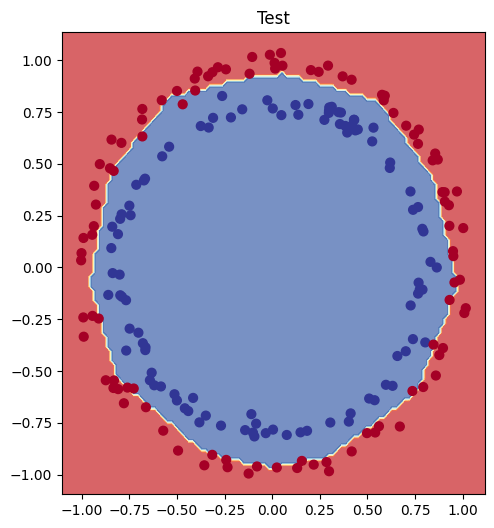

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)
